# Results of different f values

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,completion_time,planner_time,damage,num_disabled
0,BottomUpScannerPlanner,1.1,300,10.0,5.0,1088.017991,0.011117,176669.314291,300.0
1,BottomUpScannerPlanner,1.2,300,10.0,5.0,552.964333,0.009069,91021.258382,300.0
2,BottomUpScannerPlanner,1.3,300,10.0,5.0,373.001050,0.010027,61988.287374,300.0
3,BottomUpScannerPlanner,1.4,300,10.0,5.0,282.342558,0.008716,47268.746653,300.0
4,BottomUpScannerPlanner,1.5,300,10.0,5.0,227.589529,0.009865,38329.642046,300.0


In [11]:
num_agents = 300

results = results.loc[results['num_agents']==num_agents]

planners_names = [
    'StaticLinePlanner', 'TravelingLinePlanner', 'Practical100TravelingLinePlanner','Practical100TravelingLinePlanner','SeparateTravelingPlanner','IterativeAssignmentPlanner','KmeansAssignmentPlanner',
                  'BottomUpScannerPlanner', 'TopDownScannerPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* agent num n is 300

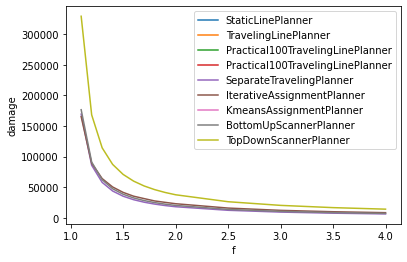

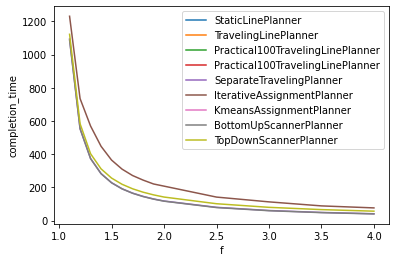

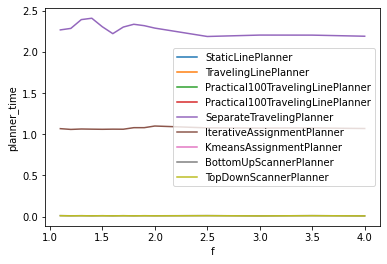

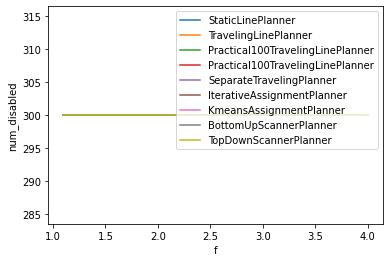

In [12]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()